In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML


### Ex.1 

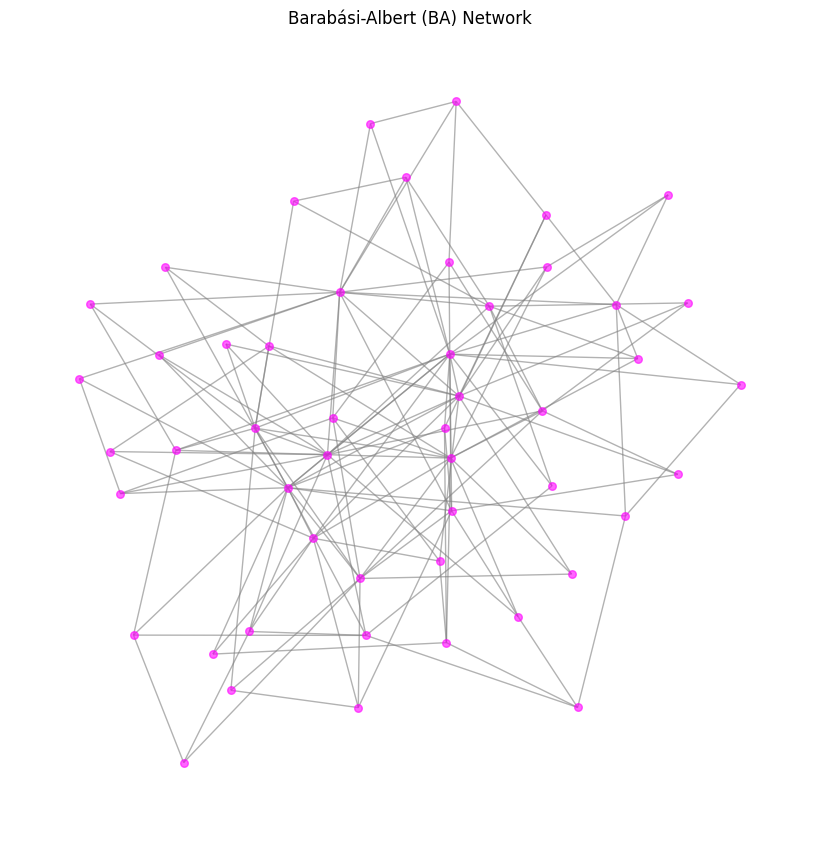

In [ ]:
import random

import random

def barabasi_albert_graph(N, m):
    if m < 1:
        raise ValueError("m must be at least 1")
    if N <= m:
        raise ValueError("N must be greater than m")
    

    initial_nodes = m + 1
    graph = {i: set() for i in range(initial_nodes)}
    

    for i in range(initial_nodes):
        for j in range(i + 1, initial_nodes):
            graph[i].add(j)
            graph[j].add(i)
    
    for new_node in range(initial_nodes, N):
        graph[new_node] = set()
        
        degrees = {node: len(neighbors) for node, neighbors in graph.items()}
        
        existing_nodes = list(range(new_node))  # all nodes before the new one
        degree_values = [degrees[node] for node in existing_nodes]
        
        total_degree = sum(degree_values)
        probabilities = [deg / total_degree for deg in degree_values]

        connected_nodes = set()
        while len(connected_nodes) < m:
            node = random.choices(existing_nodes, probabilities, k=1)[0]
            connected_nodes.add(node)
        
        for node in connected_nodes:
            graph[new_node].add(node)
            graph[node].add(new_node)
    
    return graph



def visualize_ba_graph(graph):
    G = nx.Graph(graph)

    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42) 
    nx.draw(G, pos, with_labels=False, node_size=30, node_color='fuchsia', alpha=0.6, edge_color='gray')
    plt.title('Barabási-Albert (BA) Network')
    plt.show()


N = 50 
m = 3    
graph = barabasi_albert_graph(N, m)

visualize_ba_graph(graph)


### Ex. 2

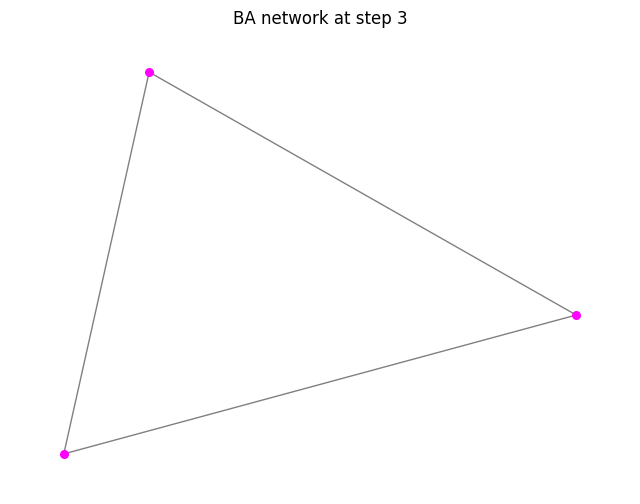

In [ ]:
def animate_ba_growth(n, m):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    graph = barabasi_albert_graph(m+1, m)  
    
    def update(num):
        ax.clear()
        sub_graph = barabasi_albert_graph(num, m)
        
        G = nx.Graph(sub_graph)
        
        pos = nx.spring_layout(G, seed=42)  
        nx.draw_networkx_nodes(G, pos, node_size=30, node_color="fuchsia", ax=ax)
        nx.draw_networkx_edges(G, pos, edge_color="gray", ax=ax)
        
        ax.set_title(f"BA network at step {num}")
        ax.axis("off")  
        
    ani = animation.FuncAnimation(fig, update, frames=range(m+1, n+1), interval=500)
    return HTML(ani.to_jshtml())

animate_ba_growth(50, 2)

### Ex. 3

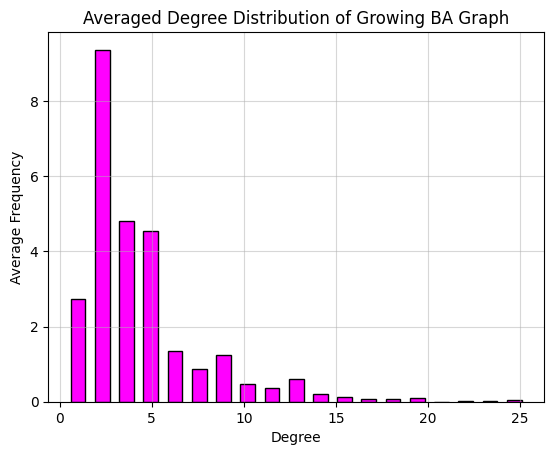

In [9]:

def generate_ba_graph_progression(m, final_n):
    distributions = []
    
    for n in range(m + 1, final_n + 1):
        G = barabasi_albert_graph(n, m)
        
        node_degrees = [len(neighbors) for neighbors in G.values()]
        distributions.append(node_degrees)
    
    return distributions

def plot_averaged_degree_distribution(distributions):
    all_degrees = [degree for dist in distributions for degree in dist]
    
    bins = np.linspace(1, max(all_degrees), 20)  
    
    hist_data = []
    for degrees in distributions:
        hist, _ = np.histogram(degrees, bins=bins)
        hist_data.append(hist)
    
    avg_hist = np.mean(hist_data, axis=0)
    
    plt.bar(bins[:-1], avg_hist, color='fuchsia', edgecolor='black')
    
    plt.title('Averaged Degree Distribution of Growing BA Graph')
    plt.xlabel('Degree')
    plt.ylabel('Average Frequency')
    plt.grid(True, which='both', ls='-', alpha=0.5)
    plt.show()


m = 3  
final_n = 50  

distributions = generate_ba_graph_progression(m, final_n)

plot_averaged_degree_distribution(distributions)

### Ex. 4

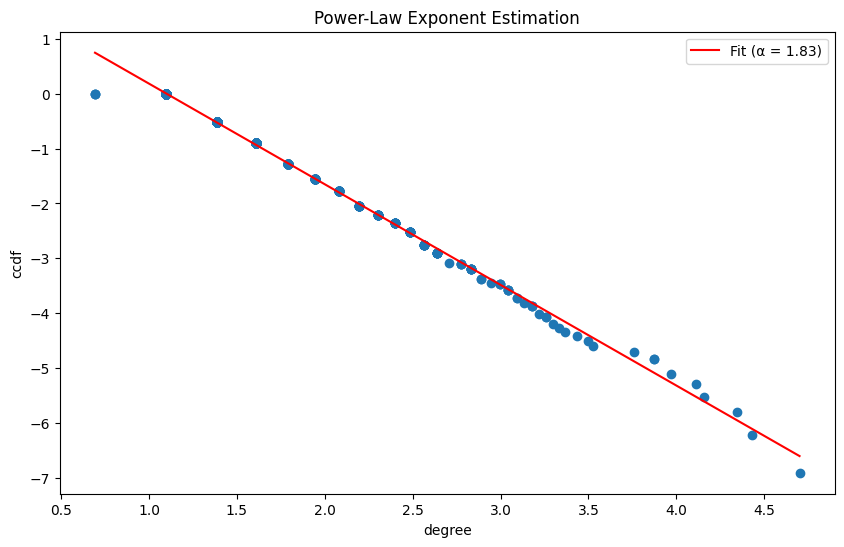

Estimated power-law exponent (α): 1.8343793342666537


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def estimate_power_law_exponent(degrees):
    degrees = np.array([d for d in degrees if d > 0])
    degrees.sort()
    
    ccdf = np.array([(len(degrees[degrees >= d]) / len(degrees)) for d in degrees])
    
    log_degrees = np.log(degrees)
    log_ccdf = np.log(ccdf)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_degrees, log_ccdf)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(log_degrees, log_ccdf)
    plt.plot(log_degrees, slope * log_degrees + intercept, 'r', label=f'Fit (α = {-slope:.2f})')
    plt.xlabel('degree')
    plt.ylabel('ccdf')
    plt.title('Power-Law Exponent Estimation')
    plt.legend()
    plt.show()
    
    return abs(slope)

m = 3 
n = 1000  

G = barabasi_albert_graph(n, m)
degrees = [len(neighbors) for neighbors in G.values()]

alpha = estimate_power_law_exponent(degrees)
print(f"Estimated power-law exponent (α): {alpha}")


### P6.3 (1.5 points)

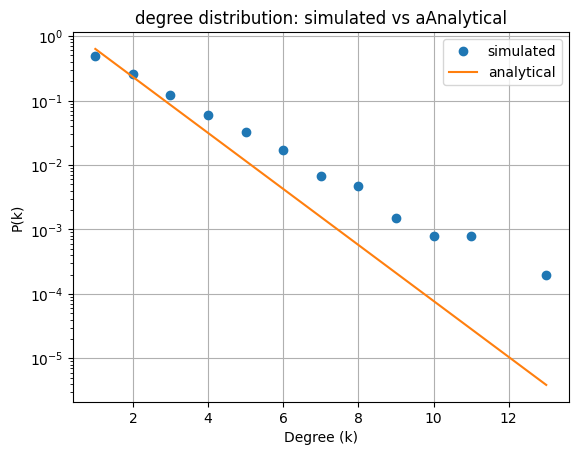

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t_max = 10_000  
m = 1         
m0 = 1         

degrees = np.zeros(t_max + 1)

for t in range(1, t_max + 1):
    target = np.random.randint(0, t)  
    degrees[t] += m                   
    degrees[target] += m              

unique_degrees, counts = np.unique(degrees, return_counts=True)
P_k_simulated = counts / np.sum(counts) 

k_values = unique_degrees


P_k_analytical_adjusted = (np.exp(1) / m) * np.exp(-k_values / m)
P_k_analytical_adjusted /= np.sum(P_k_analytical_adjusted)  

plt.plot(k_values, P_k_simulated, 'o', label="simulated")
plt.plot(k_values, P_k_analytical_adjusted, '-', label="analytical")
plt.yscale("log")
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.title("degree distribution: simulated vs aAnalytical")
plt.legend()
plt.grid(True)
plt.show()

### P6.4 (1.5 points)

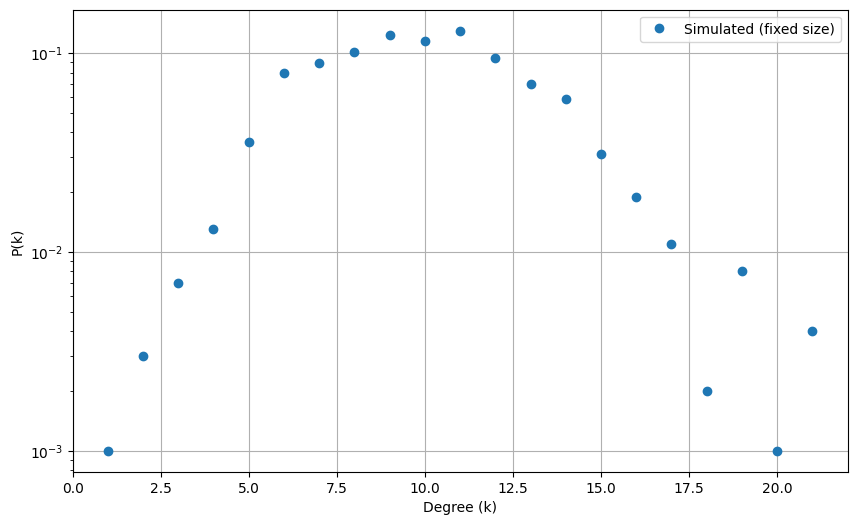

In [7]:
N = 1000
edges_per_step = 1  
t_max_fixed = 10_000  

degrees_fixed = np.zeros(N)

for t in range(t_max_fixed):
    probabilities = np.ones(N) / N  

    target_node = np.random.choice(N, p=probabilities)
    degrees_fixed[target_node] += 1


unique_degrees_fixed, counts_fixed = np.unique(degrees_fixed, return_counts=True)
P_k_simulated_fixed = counts_fixed / np.sum(counts_fixed) 


plt.figure(figsize=(10, 6))
plt.plot(unique_degrees_fixed, P_k_simulated_fixed, 'o', label="Simulated (fixed size)")
plt.yscale("log")
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.legend()
plt.grid(True)
plt.show()
